<a href="https://colab.research.google.com/github/Pritam-BA/DAY1/blob/main/DAY1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Create dummy e-commerce inventory data
def create_inventory_data():
    """
    Generate realistic e-commerce inventory data for Indian market
    """

    # Product categories popular in Indian e-commerce
    categories = ['Electronics', 'Fashion', 'Home & Kitchen', 'Books', 'Beauty']
    brands = ['Samsung', 'Apple', 'Xiaomi', 'Nike', 'Adidas', 'Boat', 'Noise', 'Prestige']
    cities = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad', 'Pune']

    # Generate 200 product records
    n_products = 200

    data = {
        'product_id': [f'PROD_{i:03d}' for i in range(1, n_products + 1)],
        'product_name': [f'Product_{i}' for i in range(1, n_products + 1)],
        'category': np.random.choice(categories, n_products),
        'brand': np.random.choice(brands, n_products),
        'warehouse_city': np.random.choice(cities, n_products),
        'current_stock': np.random.randint(0, 500, n_products),
        'reorder_level': np.random.randint(20, 100, n_products),
        'unit_cost': np.random.uniform(100, 5000, n_products),  # in INR
        'selling_price': np.random.uniform(150, 7500, n_products),  # in INR
        'units_sold_last_30_days': np.random.randint(0, 200, n_products),
        'supplier_lead_time': np.random.randint(3, 21, n_products),  # days
        'last_updated': pd.date_range(start='2024-01-01', periods=n_products, freq='D')[:n_products]
    }

    df = pd.DataFrame(data)

    # Calculate derived metrics
    df['profit_margin'] = ((df['selling_price'] - df['unit_cost']) / df['selling_price'] * 100).round(2)
    df['inventory_value'] = (df['current_stock'] * df['unit_cost']).round(2)
    df['needs_reorder'] = df['current_stock'] <= df['reorder_level']
    df['stockout_risk'] = df['current_stock'] / df['units_sold_last_30_days'].replace(0, 1)
    df['stockout_risk'] = df['stockout_risk'].replace([np.inf, -np.inf], 999).round(2)

    return df

# Create the dataset
inventory_df = create_inventory_data()
print("📦 Desi Bazaar Inventory Dataset Created!")
print(f"Dataset Shape: {inventory_df.shape}")
print("\n🔍 First 5 records:")
inventory_df.head()


📦 Desi Bazaar Inventory Dataset Created!
Dataset Shape: (200, 16)

🔍 First 5 records:


,product_id,product_name,category,brand,warehouse_city,current_stock,reorder_level,unit_cost,selling_price,units_sold_last_30_days,supplier_lead_time,last_updated,profit_margin,inventory_value,needs_reorder,stockout_risk
0,PROD_001,Product_1,Books,Apple,Pune,457,68,1136.095234,1458.564356,152,9,2024-01-01,22.11,519195.52,False,3.01
1,PROD_002,Product_2,Beauty,Boat,Delhi,89,33,1704.737026,7213.866833,140,4,2024-01-02,76.37,151721.60,False,0.64
2,PROD_003,Product_3,Home & Kitchen,Boat,Pune,417,34,686.834446,1242.671049,160,15,2024-01-03,44.73,286409.96,False,2.61
3,PROD_004,Product_4,Beauty,Xiaomi,Bangalore,114,50,4463.583676,3197.487309,15,16,2024-01-04,-39.60,508848.54,False,7.60
4,PROD_005,Product_5,Beauty,Noise,Delhi,104,20,3008.603022,777.320060,169,19,2024-01-05,-287.05,312894.71,False,0.62


In [ ]:
# ===== STEP 1: DATA EXPLORATION & CLEANING =====

# Basic dataset information
print("=" * 50)
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"Total Products: {len(inventory_df)}")
print(f"Categories: {inventory_df['category'].nunique()}")
print(f"Brands: {inventory_df['brand'].nunique()}")
print(f"Warehouse Cities: {inventory_df['warehouse_city'].nunique()}")

# Check for missing values
print("\n🔍 Missing Values Check:")
print(inventory_df.isnull().sum())

# Basic statistics
print("\n📊 Key Metrics Summary:")
print(inventory_df[['current_stock', 'unit_cost', 'selling_price', 'profit_margin']].describe())

# Data types
print("\n📝 Data Types:")
print(inventory_df.dtypes)


📋 DATASET OVERVIEW
Total Products: 200
Categories: 5
Brands: 8
Warehouse Cities: 7

🔍 Missing Values Check:
product_id                 0
product_name               0
category                   0
brand                      0
warehouse_city             0
current_stock              0
reorder_level              0
unit_cost                  0
selling_price              0
units_sold_last_30_days    0
supplier_lead_time         0
last_updated               0
profit_margin              0
inventory_value            0
needs_reorder              0
stockout_risk              0
dtype: int64

📊 Key Metrics Summary:
       current_stock    unit_cost  selling_price  profit_margin
count     200.000000   200.000000     200.000000     200.000000
mean      245.330000  2549.445507    3632.552990     -45.277750
std       140.753432  1370.905061    2164.342416     237.870536
min         0.000000   122.696913     230.819341   -1853.010000
25%       138.750000  1329.760738    1689.095576     -38.940000
50%    

In [ ]:
# ===== STEP 2: INVENTORY ANALYSIS =====

print("\n" + "=" * 50)
print("📈 BUSINESS ANALYTICS INSIGHTS")
print("=" * 50)

# 1. Category-wise Analysis
print("\n🏷️ CATEGORY PERFORMANCE:")
category_analysis = inventory_df.groupby('category').agg({
    'current_stock': 'sum',
    'inventory_value': 'sum',
    'units_sold_last_30_days': 'sum',
    'profit_margin': 'mean'
}).round(2)

category_analysis['avg_stock_per_product'] = (
    inventory_df.groupby('category')['current_stock'].mean().round(0)
)

print(category_analysis)

# 2. Stock Status Analysis
print("\n⚠️ STOCK STATUS ALERTS:")
stock_alerts = {
    'Products needing reorder': inventory_df['needs_reorder'].sum(),
    'Out of stock products': (inventory_df['current_stock'] == 0).sum(),
    'Overstocked products': (inventory_df['current_stock'] > inventory_df['current_stock'].quantile(0.9)).sum(),
    'High risk stockout (ratio < 1)': (inventory_df['stockout_risk'] < 1).sum()
}

for alert, count in stock_alerts.items():
    print(f"• {alert}: {count}")

# 3. Top Performers Analysis
print("\n🏆 TOP PERFORMERS:")
print("Top 5 Revenue Generators (by sales):")
top_revenue = inventory_df.nlargest(5, 'units_sold_last_30_days')[
    ['product_id', 'category', 'brand', 'units_sold_last_30_days', 'profit_margin']
]
print(top_revenue)

print("\nTop 5 Profit Margin Products:")
top_margin = inventory_df.nlargest(5, 'profit_margin')[
    ['product_id', 'category', 'brand', 'profit_margin', 'current_stock']
]
print(top_margin)



📈 BUSINESS ANALYTICS INSIGHTS

🏷️ CATEGORY PERFORMANCE:
                current_stock  inventory_value  units_sold_last_30_days  \
category                                                                  
Beauty                   8468      17819764.60                     3603   
Books                   12211      34072990.01                     4972   
Electronics              9924      25022805.77                     4363   
Fashion                  9174      24429254.09                     3227   
Home & Kitchen           9289      22120117.32                     3632   

                profit_margin  avg_stock_per_product  
category                                              
Beauty                 -50.14                  235.0  
Books                  -43.46                  249.0  
Electronics            -59.35                  231.0  
Fashion                -48.96                  262.0  
Home & Kitchen         -23.12                  251.0  

⚠️ STOCK STATUS ALERTS:
• Produ

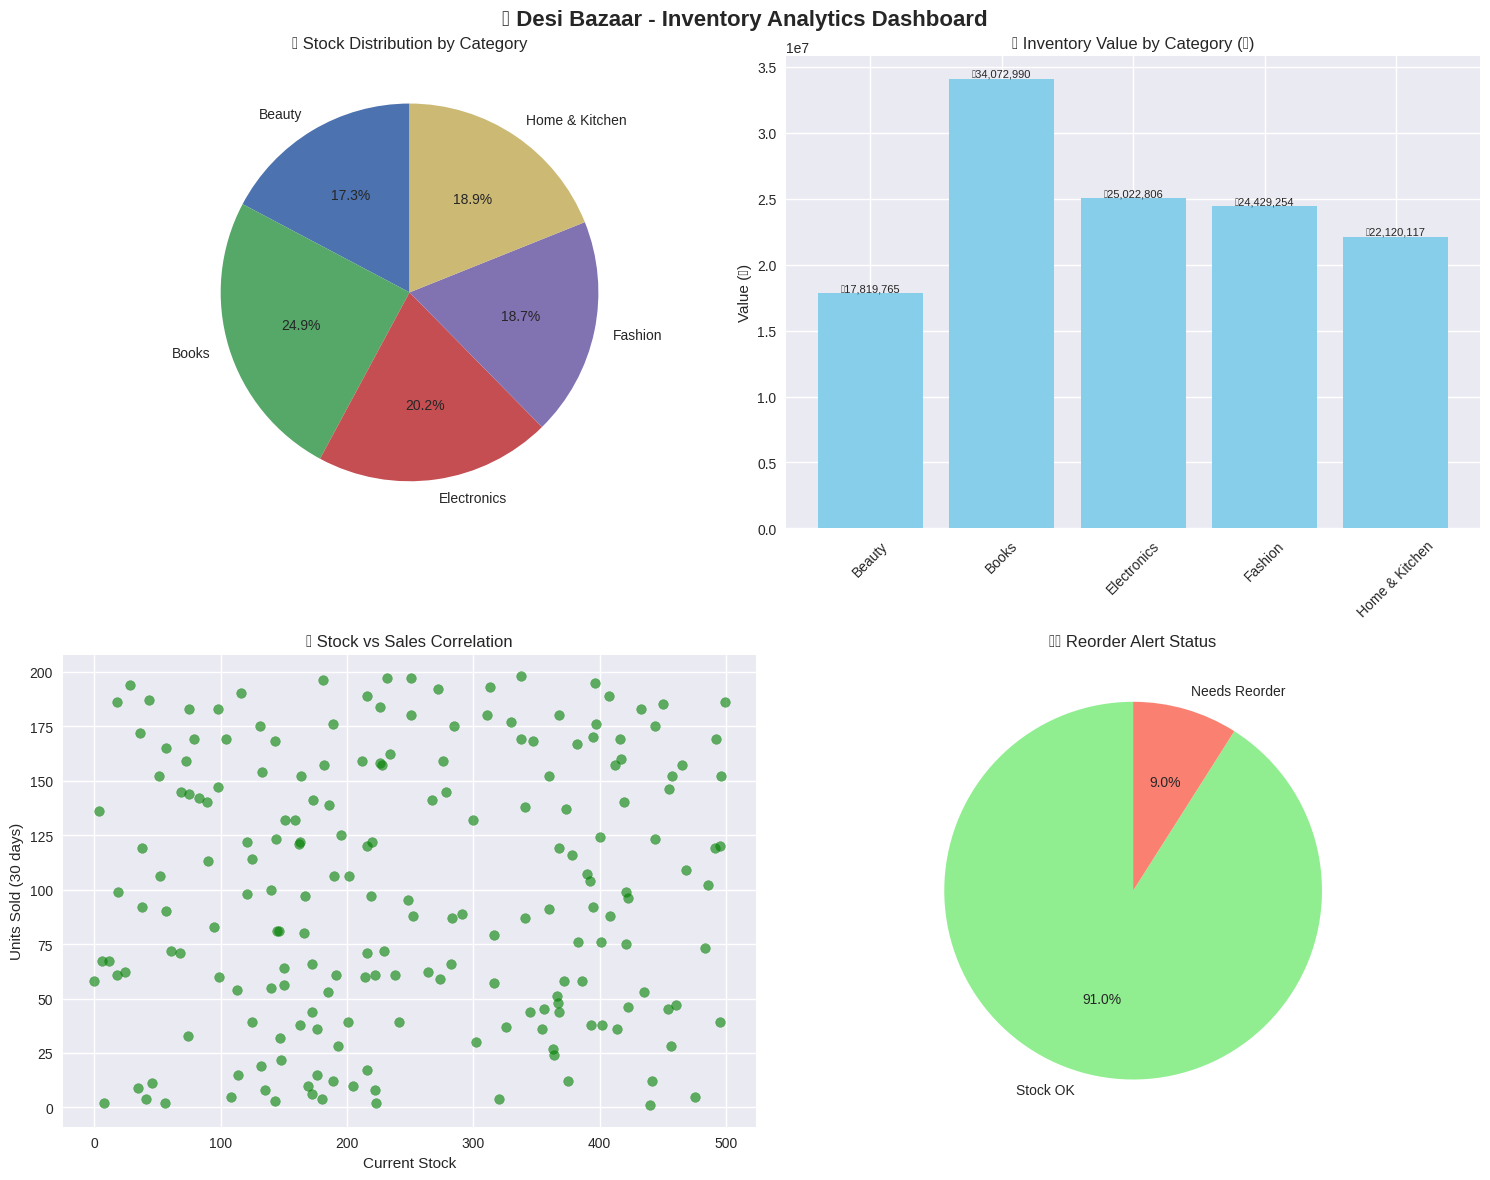


🏢 WAREHOUSE PERFORMANCE:
                Total Stock  Inventory Value (₹)  Reorder Alerts
warehouse_city                                                  
Delhi                  7671          22100899.65               3
Chennai                8084          20057239.73               2
Kolkata                8878          19393144.09               3
Mumbai                 6006          18469584.78               2
Hyderabad              7364          16335792.29               3
Pune                   6632          14460970.83               3
Bangalore              4431          12647300.42               2


In [ ]:
# ===== STEP 3: VISUALIZATIONS =====

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🛒 Desi Bazaar - Inventory Analytics Dashboard', fontsize=16, fontweight='bold')

# 1. Category-wise Stock Distribution
category_stock = inventory_df.groupby('category')['current_stock'].sum()
axes[0, 0].pie(category_stock.values, labels=category_stock.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('📊 Stock Distribution by Category')

# 2. Inventory Value by Category
category_value = inventory_df.groupby('category')['inventory_value'].sum()
bars = axes[0, 1].bar(category_value.index, category_value.values, color='skyblue')
axes[0, 1].set_title('💰 Inventory Value by Category (₹)')
axes[0, 1].set_ylabel('Value (₹)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'₹{height:,.0f}', ha='center', va='bottom', fontsize=8)

# 3. Stock Level vs Sales Relationship
axes[1, 0].scatter(inventory_df['current_stock'], inventory_df['units_sold_last_30_days'],
                   alpha=0.6, color='green')
axes[1, 0].set_xlabel('Current Stock')
axes[1, 0].set_ylabel('Units Sold (30 days)')
axes[1, 0].set_title('📈 Stock vs Sales Correlation')

# 4. Reorder Alert Status
reorder_status = inventory_df['needs_reorder'].value_counts()
colors = ['lightgreen', 'salmon']
axes[1, 1].pie(reorder_status.values, labels=['Stock OK', 'Needs Reorder'],
               colors=colors, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('⚠️ Reorder Alert Status')

plt.tight_layout()
plt.show()

# Additional: Warehouse-wise Analysis
print("\n🏢 WAREHOUSE PERFORMANCE:")
warehouse_analysis = inventory_df.groupby('warehouse_city').agg({
    'current_stock': 'sum',
    'inventory_value': 'sum',
    'needs_reorder': 'sum'
}).round(2)
warehouse_analysis.columns = ['Total Stock', 'Inventory Value (₹)', 'Reorder Alerts']
print(warehouse_analysis.sort_values('Inventory Value (₹)', ascending=False))


In [ ]:
# Generate category insights
print("\n" + "🎯" * 20)
print("BUSINESS RECOMMENDATIONS")
print("🎯" * 40)

# Find underperforming categories
low_turnover = category_analysis[category_analysis['units_sold_last_30_days'] < category_analysis['units_sold_last_30_days'].mean()]
print(f"\n💡 INSIGHT 1 - Category Performance:")
print(f"Categories with below-average sales: {list(low_turnover.index)}")
print(f"📋 RECOMMENDATION: Focus marketing efforts on these categories or consider inventory reduction")



🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
BUSINESS RECOMMENDATIONS
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

💡 INSIGHT 1 - Category Performance:
Categories with below-average sales: ['Beauty', 'Fashion', 'Home & Kitchen']
📋 RECOMMENDATION: Focus marketing efforts on these categories or consider inventory reduction


In [ ]:
# Critical stock alerts
critical_products = inventory_df[
    (inventory_df['current_stock'] == 0) |
    (inventory_df['stockout_risk'] < 0.5)
][['product_id', 'category', 'current_stock', 'units_sold_last_30_days']]

print(f"\n💡 INSIGHT 2 - Critical Stock Issues:")
print(f"Products at risk: {len(critical_products)}")
print(f"📋 RECOMMENDATION: Implement automated reorder system for high-velocity items")



💡 INSIGHT 2 - Critical Stock Issues:
Products at risk: 20
📋 RECOMMENDATION: Implement automated reorder system for high-velocity items


In [ ]:
# Profitability insights
high_margin_low_stock = inventory_df[
    (inventory_df['profit_margin'] > inventory_df['profit_margin'].quantile(0.75)) &
    (inventory_df['current_stock'] < inventory_df['reorder_level'])
]

print(f"\n💡 INSIGHT 3 - Profit Optimization:")
print(f"High-margin products with low stock: {len(high_margin_low_stock)}")
print(f"Potential lost profit: ₹{(high_margin_low_stock['selling_price'] * high_margin_low_stock['units_sold_last_30_days']).sum():,.2f}")
print(f"📋 RECOMMENDATION: Prioritize restocking high-margin items to maximize profitability")



💡 INSIGHT 3 - Profit Optimization:
High-margin products with low stock: 6
Potential lost profit: ₹2,315,341.49
📋 RECOMMENDATION: Prioritize restocking high-margin items to maximize profitability


In [ ]:
print("\n" + "🎯" * 20)
print("INTERVIEW CHALLENGE")
print("🎯" * 40)
print("""
📝 CHALLENGE: Create an Inventory Optimization Algorithm

Your task:
1. Build a demand forecasting model using historical sales data
2. Calculate optimal reorder quantities using Economic Order Quantity (EOQ) formula
3. Create a dynamic pricing strategy based on stock levels and demand
4. Design an automated alert system for inventory managers

Bonus Questions for Interview:
• How would you handle seasonal demand patterns?
• What metrics would you use to measure inventory efficiency?
• How would you implement this system in a real-time environment?
• What are the risks of over-optimization in inventory management?

Advanced Python Concepts to Explore:
• Time series forecasting with Prophet/ARIMA
• Machine learning for demand prediction
• API integration for real-time updates
• Database connections for production systems
""")



🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
INTERVIEW CHALLENGE
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

📝 CHALLENGE: Create an Inventory Optimization Algorithm

Your task:
1. Build a demand forecasting model using historical sales data
2. Calculate optimal reorder quantities using Economic Order Quantity (EOQ) formula
3. Create a dynamic pricing strategy based on stock levels and demand
4. Design an automated alert system for inventory managers

Bonus Questions for Interview:
• How would you handle seasonal demand patterns?
• What metrics would you use to measure inventory efficiency?
• How would you implement this system in a real-time environment?
• What are the risks of over-optimization in inventory management?

Advanced Python Concepts to Explore:
• Time series forecasting with Prophet/ARIMA
• Machine learning for demand prediction
• API integration for real-time updates
• Database connections for production systems



In [ ]:
# Starter code for the challenge
def calculate_eoq(annual_demand, ordering_cost, holding_cost):
    """
    Calculate Economic Order Quantity
    EOQ = √(2 × Annual Demand × Ordering Cost / Holding Cost)
    """
    import math
    return math.sqrt((2 * annual_demand * ordering_cost) / holding_cost)

def inventory_turnover_ratio(cogs, avg_inventory):
    """
    Calculate Inventory Turnover Ratio
    Higher ratio indicates efficient inventory management
    """
    return cogs / avg_inventory

# Challenge: Implement these functions with the inventory dataset
print("\n🎯 Implement these advanced functions to complete the challenge!")



🎯 Implement these advanced functions to complete the challenge!
